In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'requirements.txt', 'sample.ipynb', 'sisrec_project.yml', 'test', 'Training_set']


In [2]:
print(os.listdir("./Training_set/Training_set"))

['electric bus', 'electric car']


In [3]:
import keras 
from keras.preprocessing import image
from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator
import cv2

Using TensorFlow backend.


In [4]:
datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True)
batch_size = 100

In [5]:
path = "./Training_set/Training_set"
train_generator = datagen.flow_from_directory(path,batch_size = batch_size,target_size =(150,150),class_mode = 'binary')

Found 1486 images belonging to 2 classes.


In [6]:
from keras import layers
from keras import models

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size = (2,2),activation = 'relu',padding = "same",strides = (2,2),input_shape = (150,150,3)))
model.add(keras.layers.Conv2D(64,kernel_size = (4,4),activation = 'relu',padding = "same",strides = (2,2)))
model.add(keras.layers.Conv2D(64,kernel_size = (2,2),activation = 'relu',strides = (2,2)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128,kernel_size = (4,4),activation = 'relu',padding = "same",strides = (2,2)))
model.add(keras.layers.Conv2D(128,kernel_size = (2,2),activation = 'relu',strides = (2,2)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(loss = "binary_crossentropy",optimizer = 'Adam',metrics = ['accuracy'])

In [9]:
model.fit_generator(train_generator,steps_per_epoch = 50, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
50/50 [==============================] - 21s 412ms/step - loss: 0.5287 - accuracy: 0.7362
Epoch 2/20
50/50 [==============================] - 14s 289ms/step - loss: 0.3619 - accuracy: 0.8475
Epoch 3/20
50/50 [==============================] - 14s 280ms/step - loss: 0.2749 - accuracy: 0.8871
Epoch 4/20
50/50 [==============================] - 14s 289ms/step - loss: 0.1811 - accuracy: 0.9318
Epoch 5/20
50/50 [==============================] - 14s 283ms/step - loss: 0.1180 - accuracy: 0.9556
Epoch 6/20
50/50 [==============================] - 13s 268ms/step - loss: 0.0625 - accuracy: 0.9814
Epoch 7/20
50/50 [==============================] - 13s 265ms/step - loss: 0.0378 - accuracy: 0.9875
Epoch 8/20
50/50 [==============================] - 13s 261ms/step - loss: 0.0181 - accuracy: 0.9939
Epoch 9/20
50/50 [==============================] - 13s 261ms/step - loss: 0.0048 - accuracy: 0.9988
Epoch 10/20
50/50 [========================

In [13]:
model.save('model1.h5')

In [98]:
path = "./test/test"
test_generator = datagen.flow_from_directory(path,target_size = (150,150),class_mode = 'binary',batch_size = batch_size)

Found 382 images belonging to 2 classes.


In [99]:
model.evaluate_generator(test_generator,verbose = 1,steps = len(test_generator))

4/4 [==============================] - 1s 171ms/step


[0.722121000289917, 0.8952879309654236]

In [100]:
model.metrics_names

['loss', 'accuracy']

In [78]:
img = cv2.imread('./test/test/electric car/electric__image-24.jpeg')
type(img)

numpy.ndarray

In [103]:
res = model.predict_generator(test_generator,steps=None)

382

In [109]:
res = model.predict_generator(test_generator,steps=None)

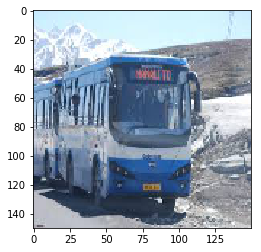

BUS


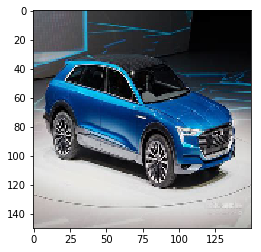

CAR


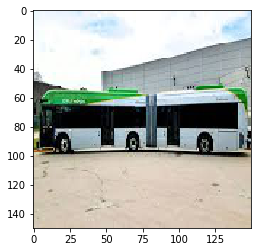

BUS


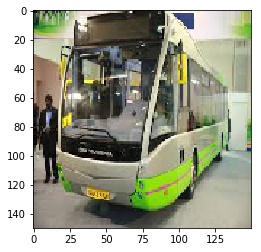

BUS


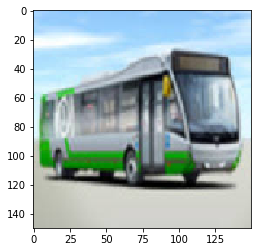

BUS


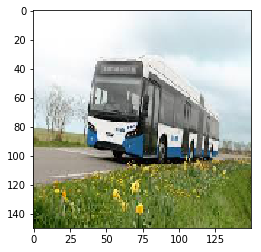

CAR


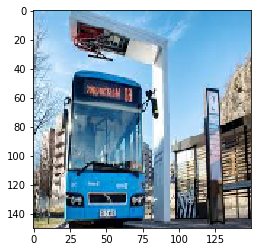

BUS


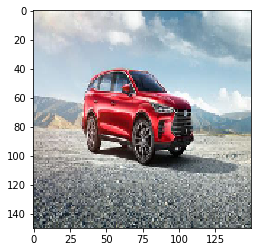

BUS


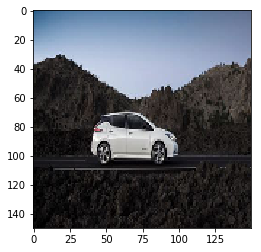

BUS


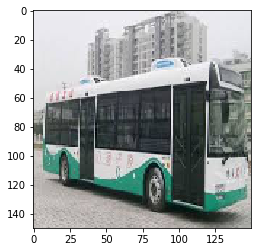

CAR


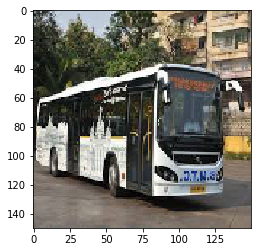

BUS


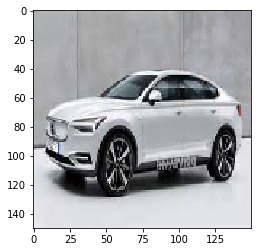

CAR


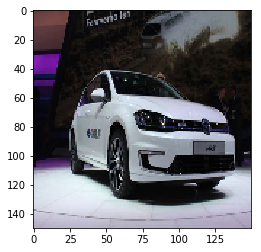

BUS


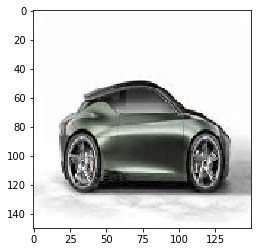

BUS


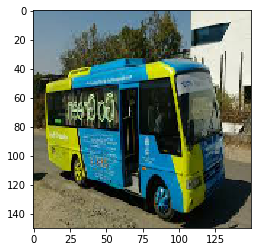

CAR


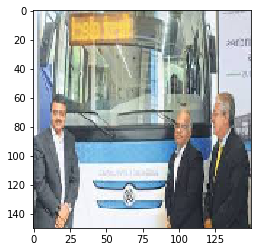

CAR


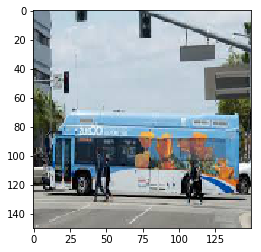

BUS


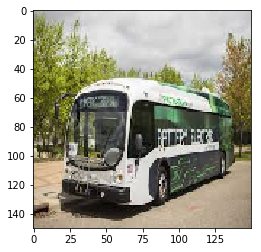

CAR


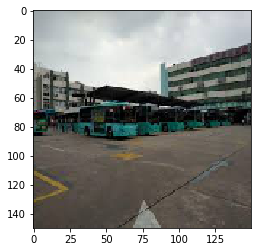

CAR


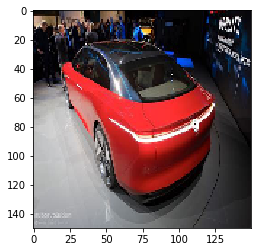

CAR


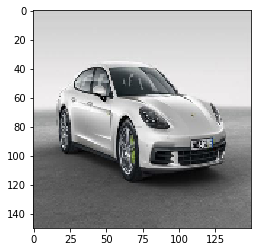

CAR


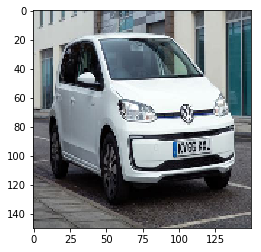

CAR


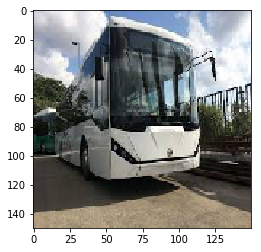

CAR


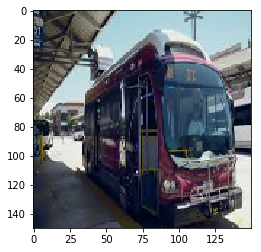

BUS


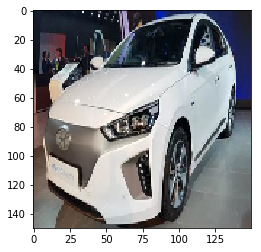

CAR


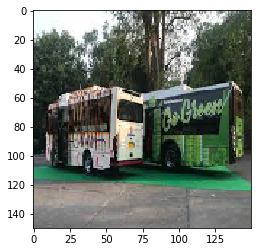

CAR


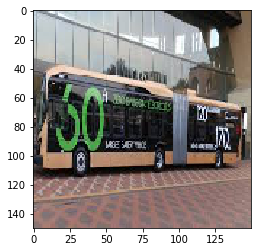

BUS


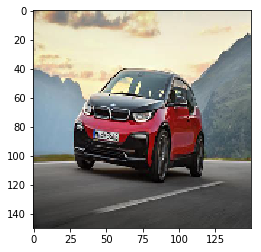

BUS


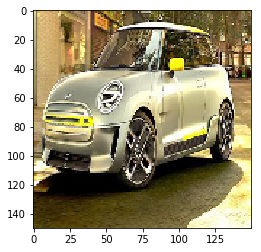

BUS


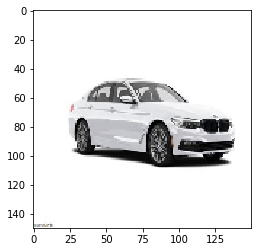

BUS


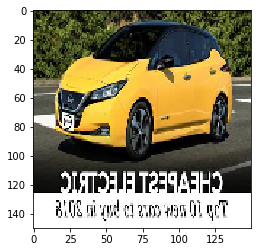

CAR


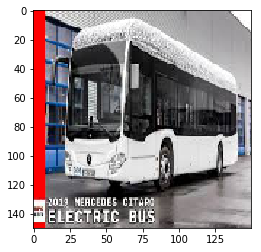

CAR


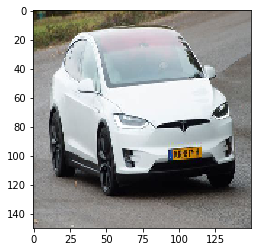

CAR


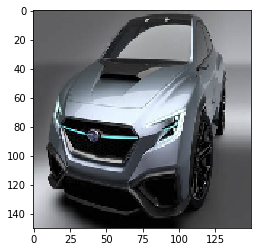

CAR


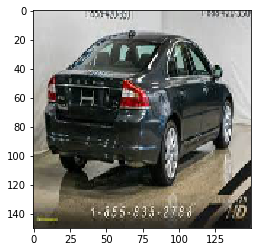

CAR


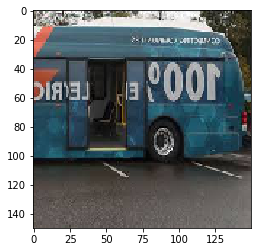

CAR


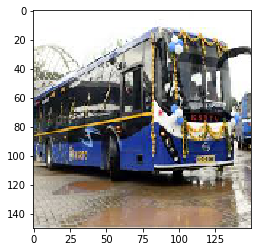

BUS


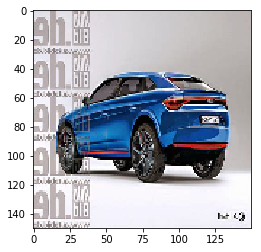

CAR


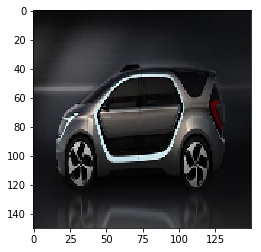

CAR


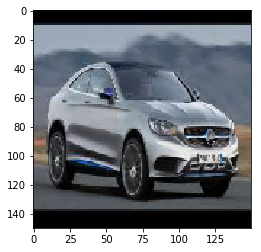

CAR


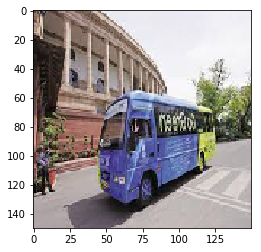

BUS


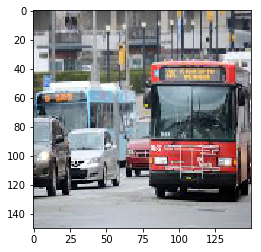

CAR


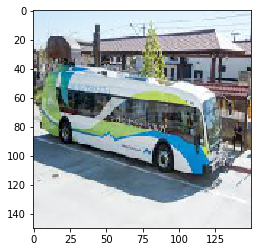

CAR


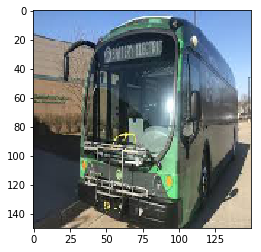

BUS


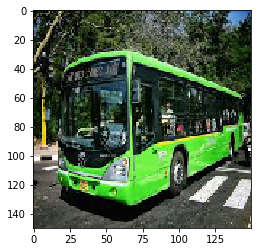

CAR


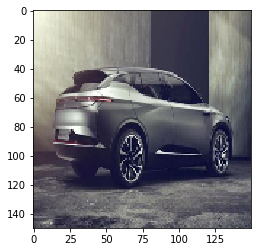

BUS


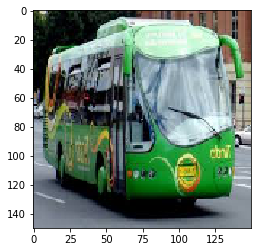

CAR


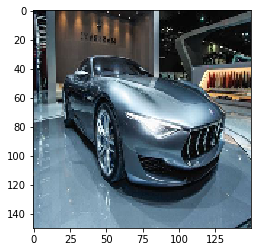

CAR


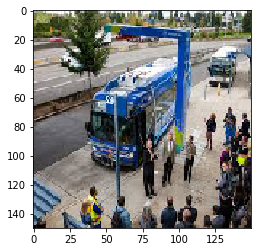

BUS


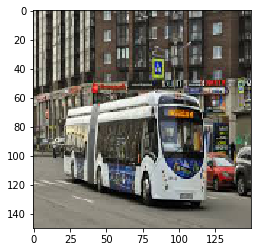

BUS


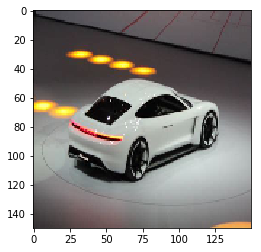

CAR


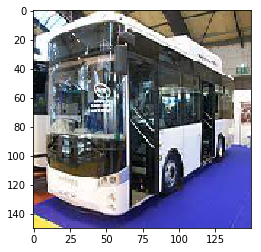

CAR


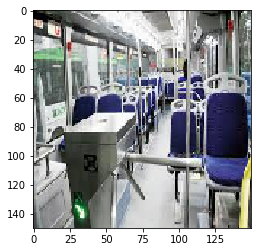

BUS


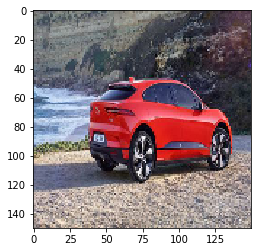

BUS


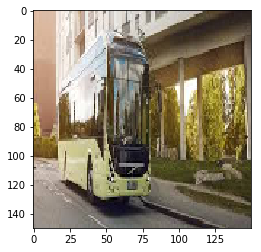

CAR


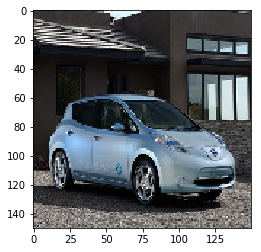

CAR


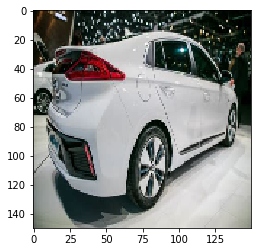

CAR


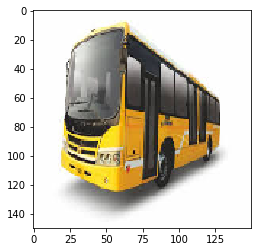

BUS


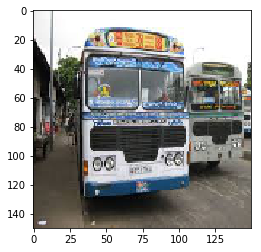

CAR


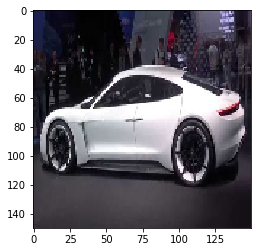

CAR


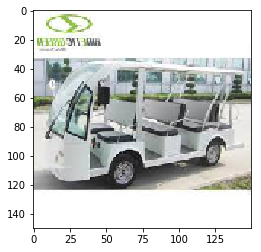

BUS


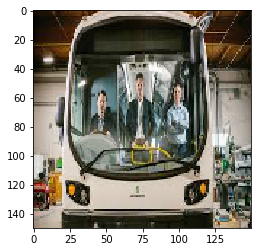

BUS


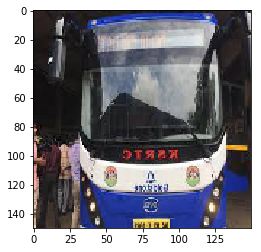

CAR


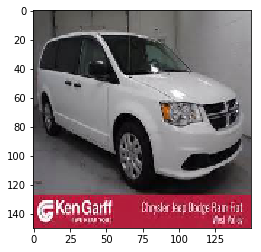

CAR


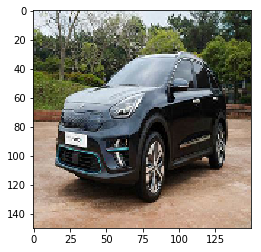

CAR


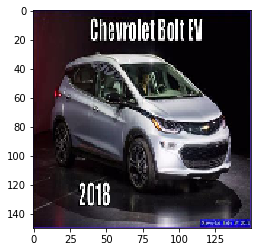

CAR


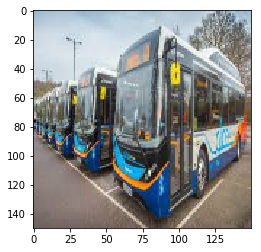

BUS


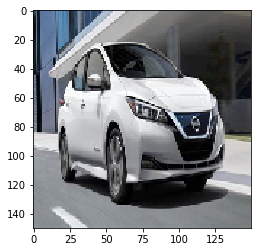

BUS


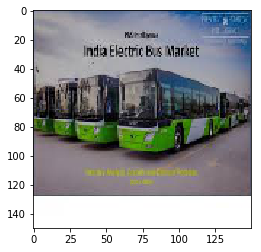

CAR


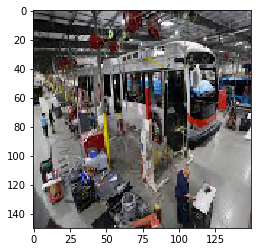

CAR


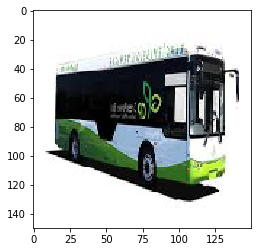

BUS


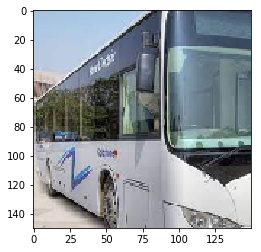

BUS


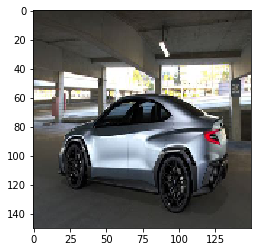

BUS


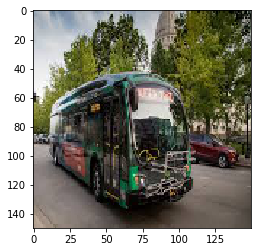

BUS


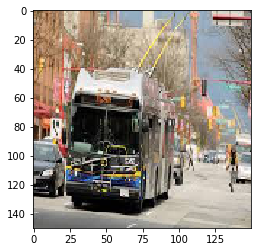

CAR


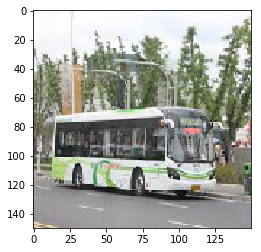

CAR


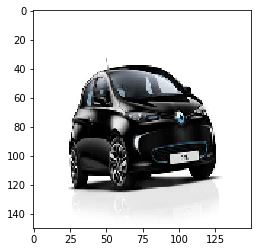

BUS


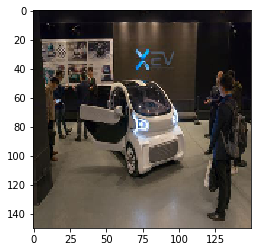

BUS


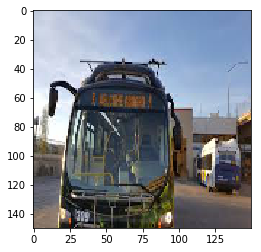

BUS


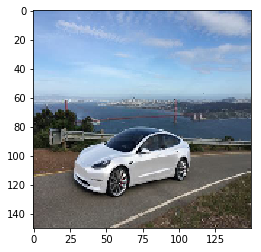

BUS


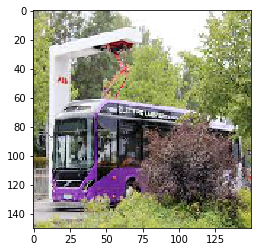

CAR


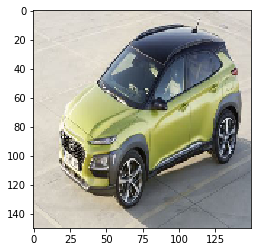

BUS


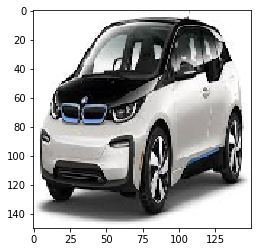

CAR


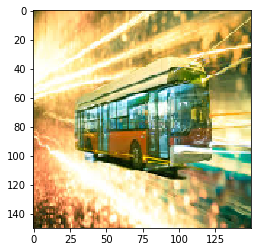

BUS


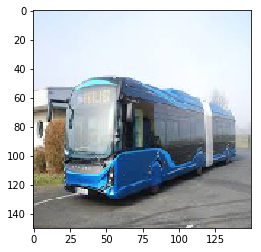

BUS


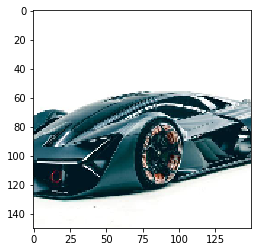

BUS


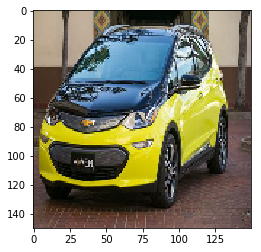

CAR


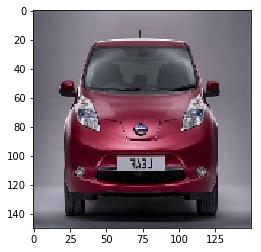

BUS


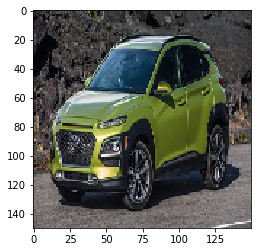

CAR


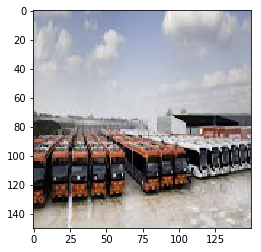

BUS


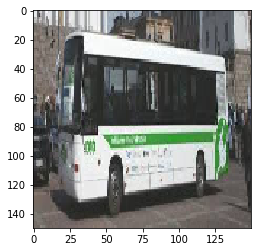

CAR


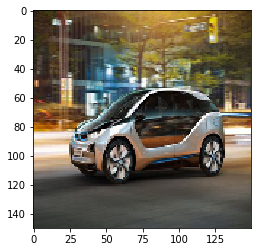

CAR


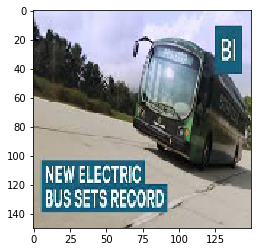

CAR


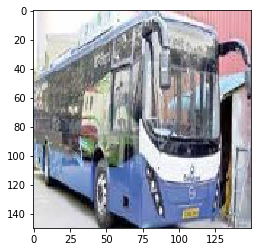

CAR


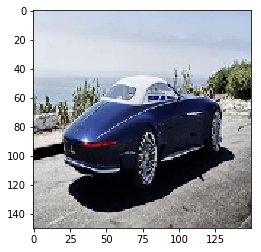

CAR


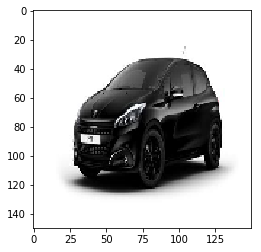

BUS


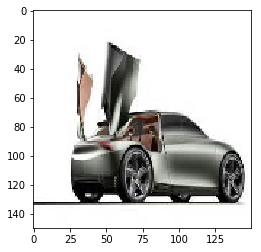

BUS


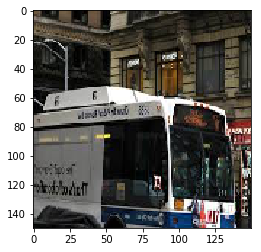

CAR


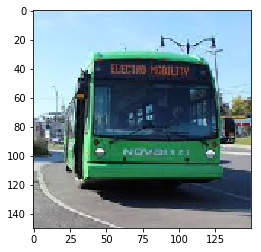

CAR


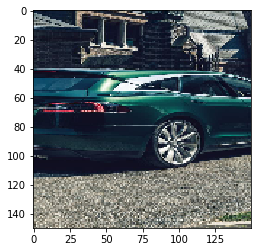

CAR


IndexError: index 100 is out of bounds for axis 0 with size 100

In [161]:
for i in range(len(res)):
    plt.imshow(test_generator[0][0][i])
    plt.show()
    if (res[i][0] >= 0.5):
        print("CAR")
    else:
        print("BUS")